In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vittoria-titanic/sample_submission.csv
/kaggle/input/vittoria-titanic/train.csv
/kaggle/input/vittoria-titanic/test.csv


1) Importamos el csv que nos han dado
    - Miramos los primero 5 datos del CSV

In [29]:
df = pd.read_csv('/kaggle/input/vittoria-titanic/train.csv')
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Nos piden que tenemos que predecir que pasajeros va a ser rescatado o no de la columna Trasported
* Vamos a comenzar haciendo una exploración básica del dataset

In [30]:
df.shape

(8693, 14)

In [31]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


El método describe() se utiliza para calcular algunos datos estadísticos como percentil, media y desviación estándar de los valores numéricos del dataframe y arroja una importante información de los datos que nos pueden ayudar a realizar un previo análisis exploratorio.
* Podemos notar que en hay valores nulos en toda las columnas

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [33]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Como vimos antes con shape y describe, hay una gran cantidad de números nulos, tenemos que valorar si quitarlos o dejarlos y poner un valor usando algun método.

In [34]:
#Valores Extraños
unique_df = df.nunique().reset_index()
unique_df.columns = ['features', 'n_values']
unique_df

,features,n_values
0,PassengerId,8693
1,HomePlanet,3
2,CryoSleep,2
3,Cabin,6560
4,Destination,3
5,Age,80
6,VIP,2
7,RoomService,1273
8,FoodCourt,1507
9,ShoppingMall,1115


In [35]:
#eliminamos filas con algun valor nulo
df = df.dropna()

In [36]:
#revisamos duplicados
print(df.duplicated().sum())

0


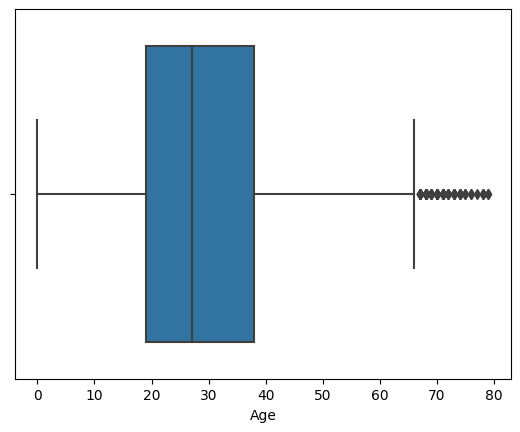

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de caja para una columna en particular
sns.boxplot(x=df['Age'])
plt.show()

No lo quitamos ya que es la edad de las personas y no es un dato erroneo

In [38]:
# Ver las columnas del DataFrame
print(df.columns)

# Eliminar columnas no relevantes
df = df.drop(['PassengerId', 'Name'], axis=1)
print(df.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')


In [39]:
df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
df.isnull().sum().sort_values(ascending=False)

/tmp/ipykernel_37/733613753.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)


HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [40]:
# Verificar el tipo de dato de cada columna
print(df.dtypes)

HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object


In [41]:
#vamos a cambiar los tipos de datos a los correctos
label = "Transported"
df[label] = df[label].astype(int)

In [42]:
df['VIP'] = df['VIP'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)


In [43]:
#La columna Cabin esta formada por 3 datos diferentes, vamos a crear una columna para cada una de estas
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)

In [44]:
df = df.drop('Cabin', axis=1)

In [45]:
#Confirmemos que todo este bien
df.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [46]:
#Paso de division de datos y trasformamos los datos a NumPy para luego pasar en TensorFlow
x = df.drop(['Transported'],axis=1)
y = df['Transported']

In [47]:
x = pd.get_dummies(x)

In [48]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape,x_test.shape

((4426, 1758), (2180, 1758))

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

rf_model.fit(x_train, y_train)

# Predecir el conjunto de prueba
y_pred = rf_model.predict(x_test)

#evaluar su precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.82


In [50]:
#matriz de confusion
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(conf_matrix)

Matriz de confusión:
[[906 165]
 [238 871]]


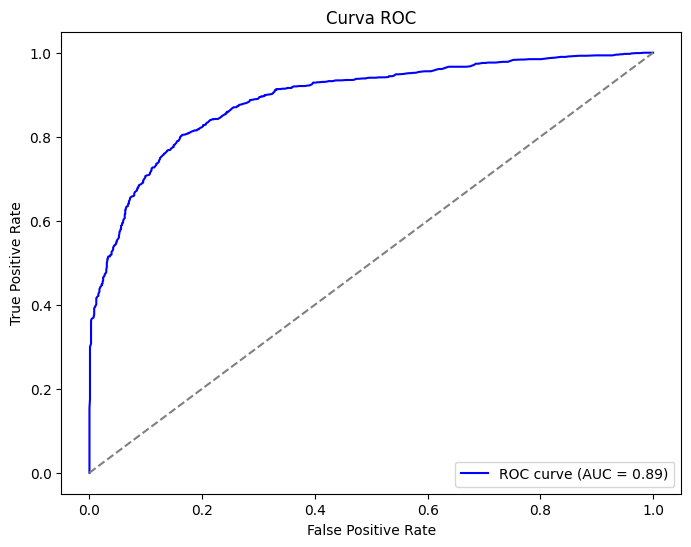

In [51]:
#visualizamos el modelo
from sklearn.metrics import roc_curve, auc

# Calcular las probabilidades de predicción
y_prob = rf_model.predict_proba(x_test)[:, 1]

# Obtener la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Dibujar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Probamos nuestro modelo en test.csv

In [52]:
# Limpieza rapida

# Cargar el conjunto de datos de prueba
test_df = pd.read_csv('/kaggle/input/vittoria-titanic/test.csv')
submission_id = test_df['PassengerId']

print(test_df)
print(submission_id)

# Reemplazar NaN con 0 en lugar de eliminar filas
test_df.fillna(0, inplace=True)

test_df = test_df.drop(['Name'], axis=1)

test_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = test_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
test_df.isnull().sum().sort_values(ascending=False)

test_df['VIP'] = test_df['VIP'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)

#La columna Cabin esta formada por 3 datos diferentes, vamos a crear una columna para cada una de estas
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)
test_df = test_df.drop('Cabin', axis=1)

# Preprocesar para el modelo
x_test = pd.get_dummies(test_df.drop(columns=['PassengerId']), drop_first=True)
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

# Generar las predicciones
y_pred_test = rf_model.predict(x_test)

#convertilo en boolean
y_pred_test_bool = (y_pred_test > 0.5).astype(bool)

output = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Transported': y_pred_test_bool
})

print(output.head())
output.to_csv('submission.csv', index=False)


     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth      True     G/3/S    TRAPPIST-1e  27.0  False   
1        0018_01      Earth     False     F/4/S    TRAPPIST-1e  19.0  False   
2        0019_01     Europa      True     C/0/S    55 Cancri e  31.0  False   
3        0021_01     Europa     False     C/1/S    TRAPPIST-1e  38.0  False   
4        0023_01      Earth     False     F/5/S    TRAPPIST-1e  20.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa 